In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
!pip3 install kaggle

In [0]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!ls

kaggle.json  sample_data


In [0]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

In [0]:
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 15.6MB/s]
100% 9.16M/9.16M [00:00<00:00, 26.4MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 75.9MB/s]
 82% 5.00M/6.09M [00:00<00:00, 6.21MB/s]
100% 6.09M/6.09M [00:00<00:00, 7.37MB/s]


In [0]:
!ls

sample_data  sample_submission.csv  test.csv.zip  train.csv.zip


In [0]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [0]:
!head train.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

In [0]:
!head test.csv

pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pix

In [0]:
!head sample_submission.csv

ImageId,Label
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
train_dataset = np.loadtxt('train.csv', skiprows=1, delimiter=',')

In [0]:
train_dataset[0:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_train = train_dataset[:, 1:]
# Переформатируем данные в 2D, бэкенд TensorFlow
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [0]:
x_train /= 255.0

In [0]:
x_train[1].shape

(28, 28, 1)

In [0]:
y_train = train_dataset[:, 0]

In [0]:
y_train[:5]

array([1., 0., 1., 4., 0.])

In [0]:
y_train = utils.to_categorical(y_train)

In [0]:
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [0]:
X_train.shape

(37800, 28, 28, 1)

In [0]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

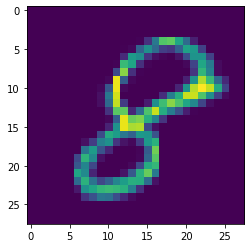

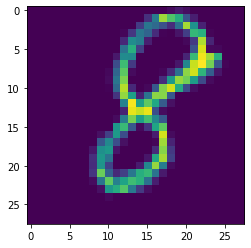

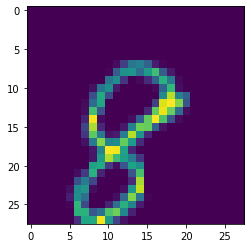

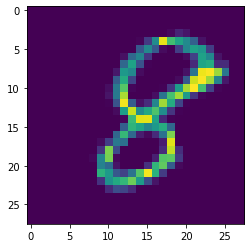

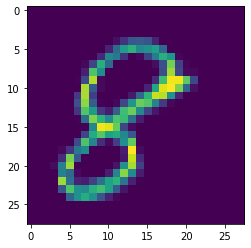

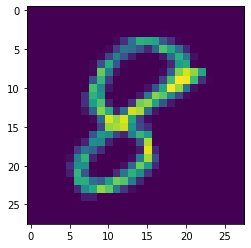

In [0]:
i = 0
data = X_train[0]
data = np.expand_dims(data, axis=0)
for batch in datagen.flow(data, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0][:,:,0])
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [0]:
сheckpoint = ModelCheckpoint('mnist-cnn.h5', 
                              monitor='val_acc', 
                              save_best_only=True,
                              verbose=1)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
batch_size=96

In [0]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                    epochs=30,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction])

Epoch 1/30
4200/393 [================================================================================================================================================================================================================================================================================================================================] - 0s 106us/sample - loss: 0.0514 - acc: 0.9779

Epoch 00001: val_acc improved from -inf to 0.97786, saving model to mnist-cnn.h5
393/393 [==============================] - 22s 56ms/step - loss: 0.4281 - acc: 0.8604 - val_loss: 0.0723 - val_acc: 0.9779
Epoch 2/30
4200/393 [================================================================================================================================================================================================================================================================================================================================] - 0s 89us/sample - loss: 0.0398 - acc: 0.9876

Epoch 00002: va

In [0]:
model.load_weights('mnist-cnn.h5')

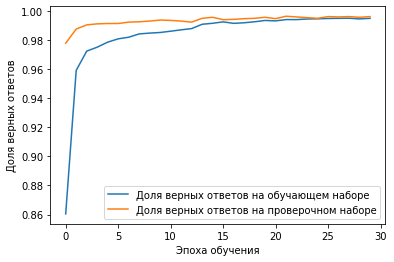

In [0]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
test_dataset = np.loadtxt('test.csv', skiprows=1, delimiter=",")

In [0]:
test_dataset[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_test = test_dataset.reshape(test_dataset.shape[0], 28, 28, 1)

In [0]:
x_test = x_test / 255.0

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[:5]

array([[2.4839822e-14, 3.2327643e-12, 1.0000000e+00, 2.4817060e-09,
        5.5217505e-14, 3.3201826e-15, 4.3029037e-14, 1.9440152e-10,
        3.1952246e-11, 3.7179549e-14],
       [9.9999964e-01, 5.4298496e-11, 1.2557020e-08, 2.8189215e-10,
        2.9562857e-09, 6.3112009e-09, 1.8332518e-07, 1.8528981e-10,
        2.6119814e-08, 7.2794634e-08],
       [3.0699840e-09, 3.6636230e-10, 5.4426319e-08, 2.7199031e-08,
        3.9220131e-06, 5.8367502e-09, 1.4603534e-12, 5.7849057e-08,
        4.0483214e-06, 9.9999189e-01],
       [9.6712142e-01, 1.0956755e-06, 8.4056496e-04, 2.7495443e-03,
        3.5631426e-06, 1.5171038e-04, 4.2697709e-05, 3.8507162e-05,
        1.5062122e-03, 2.7544666e-02],
       [7.7969217e-17, 6.1529361e-14, 4.2622648e-11, 1.0000000e+00,
        3.7859891e-21, 8.6377728e-12, 1.1313079e-16, 8.5179290e-16,
        8.9021879e-10, 2.0597738e-13]], dtype=float32)

In [0]:
predictions = np.argmax(predictions, axis=1)

In [0]:
predictions[:5]

array([2, 0, 9, 0, 3])

In [0]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [0]:
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 0],
       [5, 3]])

In [0]:
np.savetxt('submission.csv', out, header="ImageId,Label", 
            comments="", fmt="%d,%d")

In [0]:
!head submission.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0


In [0]:
!kaggle competitions submit -c digit-recognizer -m "Submition from Colab" -f submission.csv